Dataset preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset1 = pd.read_csv('/content/20_Boreholes.txt',sep=";",decimal=",")
dataset1.info()
dataset1.head(5)




In [ ]:
# other than original 
x = dataset1.iloc[:, -7:].values  
y_class=dataset1.iloc[:, -9].values


print(x)
print(y_class)

print("Number of vlaues for each Class ",pd.value_counts(dataset1['Class']))

In [ ]:
SX_test = dataset2.iloc[:, -7:].values  
SY_test=dataset2.iloc[:, -9].values

print(SX_test)
#print(x.shape)
#y_class.shape
print(SY_test)
#dataset1.describe()
print("Number of vlaues for each Class ",pd.value_counts(dataset2['Class']))

In [ ]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


RS=0

x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.30,random_state=RS)


sc_RF = StandardScaler()
x_train = sc_RF.fit_transform(x_train)
# Validation dataset
x_test = sc_RF.transform(x_test)


Random Forest

In [ ]:
# Learn to predict each class against the other   OneVsRestClassifier(classifier)
classifier_RF = RandomForestClassifier(bootstrap=True,max_depth=80,max_features="auto",min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state = 10)
classifier_RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, random_state=10)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_RF, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 75.18 %
Standard Deviation: 6.02 %


Grid search

In [ ]:
# Determine the value 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

p_test3 = {'bootstrap': [True, False],'max_depth': [10, 40, 80, None], 'n_estimators':[100,250,500]}

tuning = GridSearchCV(estimator =RandomForestClassifier(max_features="auto",min_samples_leaf=1,min_samples_split=2),param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

({'bootstrap': True, 'max_depth': 80, 'n_estimators': 100}, 0.7637262763966854)

ROC_Curve

In [ ]:
#Calculate the y_score
y_score = classifier_RF.predict_proba(x_test)
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3,4,5])
n_classes = y_test_bin.shape[1]
print('number of classes: ',n_classes)

fpr_RF = dict()
tpr_RF = dict()
roc_auc_RF = dict()

for i in range(n_classes):
  fpr_RF[i], tpr_RF[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr_RF[i], tpr_RF[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr_RF[i], tpr_RF[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr_RF["micro"], tpr_RF["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_RF["micro"] = auc(fpr_RF["micro"], tpr_RF["micro"])

csfont = {'fontname':'Times New Roman'}

plt.figure()
lw = 3.5
plt.plot(
    fpr_RF["micro"],
    tpr_RF["micro"],
    color="deeppink",
    lw=lw,
    label="RF ROC curve (AUC = %0.3f)" % roc_auc_RF["micro"],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel("False Positive Rate",**csfont,fontsize=14)
plt.ylabel("True Positive Rate",**csfont,fontsize=14)
plt.title("Receiver operating characteristics ",**csfont,fontsize=15)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.savefig("ROC_RF.jpg",bbox_inches='tight',dpi=600)
plt.show()


Accuracy_Kappa

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
y_pred = classifier_RF.predict(x_test)
np.set_printoptions(precision=2)
print(y_pred.shape)


#Calculate accuracy 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test, y_pred)
print('kappa : %0.3f'%k)

(163,)
Confusion Matrix: 

[[20  3  2  1  0]
 [ 2 52  2  2  0]
 [ 1  5 29  1  2]
 [ 0  1  3 14  0]
 [ 0  0  0  4 19]]

overall Accuracy: 82.21 %
              precision    recall  f1-score   support

           1       0.87      0.77      0.82        26
           2       0.85      0.90      0.87        58
           3       0.81      0.76      0.78        38
           4       0.64      0.78      0.70        18
           5       0.90      0.83      0.86        23

    accuracy                           0.82       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.83      0.82      0.82       163

kappa : 0.766


[0.24 0.03 0.1  0.09 0.18 0.14 0.21]


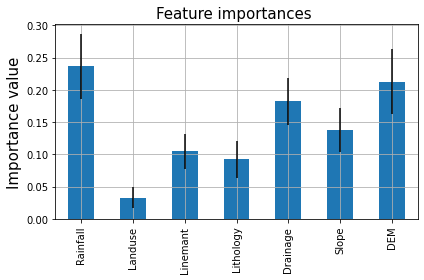

In [ ]:
importances = classifier_RF.feature_importances_




#classifier_RF.feature_importances_
forest_importances = pd.Series(importances, index=["Rainfall","Landuse","Linemant","Lithology","Drainage","Slope","DEM"])
csfont = {'fontname':'Times New Roman'}
print(importances)
std = np.std([tree.feature_importances_ for tree in classifier_RF.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ",**csfont,fontsize=15)
ax.set_ylabel("Importance value",**csfont,fontsize=15)
fig.tight_layout()
plt.grid()
plt.savefig("importance.jpg",bbox_inches='tight',dpi=600)

Predict the whole data

In [ ]:
dataset1 = pd.read_csv('/content/20_Boreholes.txt',sep=";",decimal=",")
dataset1.info()
dataset1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         541 non-null    int64  
 1   OBJECTID    541 non-null    int64  
 2   Level_ST    541 non-null    float64
 3   GWL         541 non-null    float64
 4   Class       541 non-null    int64  
 5   NEAR_DIST   541 non-null    float64
 6   Rainfall_e  541 non-null    float64
 7   Landuse_ex  541 non-null    int64  
 8   lineament_  541 non-null    float64
 9   Geology_ex  541 non-null    int64  
 10  Drainage_E  541 non-null    float64
 11  slope_exte  541 non-null    float64
 12  DEM_EXT     541 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 55.1 KB


,FID,OBJECTID,Level_ST,GWL,Class,NEAR_DIST,Rainfall_e,Landuse_ex,lineament_,Geology_ex,Drainage_E,slope_exte,DEM_EXT
0,0,1,43.0,43.000000,5,0.0,415.355011,8,0.000000,3,0.187792,5.42764,476
1,1,2,102.1,102.099998,5,0.0,357.428009,1,0.556626,8,0.234448,8.58893,1198
2,2,3,17.9,34.310200,2,0.0,405.656006,8,0.000000,24,2.370210,17.49400,458
3,3,4,15.0,13.004200,2,0.0,404.942993,8,0.000000,24,1.043940,9.73678,384
4,4,5,35.0,34.999901,4,0.0,245.022995,7,0.000000,20,1.365040,3.76924,1033


In [ ]:
#Train the whole data 
x = dataset1.iloc[:, -7:].values  # [-2,-4]
y_class=dataset1.iloc[:, -9].values


sc_RF_All = StandardScaler()
x_train_All = sc_RF_All.fit_transform(x)


classifier_ALL =RandomForestClassifier(bootstrap=True,max_depth=80,max_features="auto",min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state = 10)

classifier_ALL.fit(x_train_All, y_class)

RandomForestClassifier(max_depth=80, random_state=10)

In [ ]:
dataset2 = pd.read_csv('/content/drive/MyDrive/studyareapoints.txt',sep=";",decimal=",")
print(dataset2.shape)
dataset2.info()
dataset2.head()


(306620, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306620 entries, 0 to 306619
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FID         306620 non-null  int64  
 1   pointid     306620 non-null  int64  
 2   grid_code   306620 non-null  float64
 3   LAT         306620 non-null  float64
 4   LONG        306620 non-null  float64
 5   Rainfall_e  306620 non-null  float64
 6   Landuse_ex  306620 non-null  int64  
 7   lineament_  306620 non-null  float64
 8   Geology_ex  306620 non-null  int64  
 9   Drainage_E  306620 non-null  float64
 10  slope_exte  306620 non-null  float64
 11  DEM_EXT     306620 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 28.1 MB


,FID,pointid,grid_code,LAT,LONG,Rainfall_e,Landuse_ex,lineament_,Geology_ex,Drainage_E,slope_exte,DEM_EXT
0,0,464495,0.0,34.958714,-0.920515,454.028015,8,0.0,4,0.792559,4.76364,708
1,1,464496,0.0,34.958702,-0.919858,454.144989,8,0.0,4,0.767772,6.18293,709
2,2,464497,0.0,34.958691,-0.919202,454.260010,8,0.0,4,0.758741,6.25510,709
3,3,464498,0.0,34.958680,-0.918545,454.372986,8,0.0,4,0.792958,6.52699,708
4,4,464499,0.0,34.958669,-0.917888,454.484009,8,0.0,4,0.826668,4.58231,711


In [ ]:
XNL = dataset2.iloc[:, -7:].values  
Result_RF = dataset2.iloc[:,[-9,-8]]
print(XNL)
print(XNL.shape)
Result_RF.head()


[[4.54e+02 8.00e+00 0.00e+00 ... 7.93e-01 4.76e+00 7.08e+02]
 [4.54e+02 8.00e+00 0.00e+00 ... 7.68e-01 6.18e+00 7.09e+02]
 [4.54e+02 8.00e+00 0.00e+00 ... 7.59e-01 6.26e+00 7.09e+02]
 ...
 [4.09e+02 8.00e+00 0.00e+00 ... 4.46e-01 4.53e+00 6.71e+02]
 [4.09e+02 8.00e+00 0.00e+00 ... 4.30e-01 2.39e+00 6.73e+02]
 [4.09e+02 8.00e+00 0.00e+00 ... 4.13e-01 8.11e+00 6.71e+02]]
(306620, 7)


,LAT,LONG
0,34.958714,-0.920515
1,34.958702,-0.919858
2,34.958691,-0.919202
3,34.958680,-0.918545
4,34.958669,-0.917888


In [ ]:
XNL_T = sc_RF_All.transform(XNL) #feature scaling to unlabel data
label = classifier_ALL.predict(XNL_T) # pridiction
print(label[0])
print(label.shape)

1
(306620,)


In [ ]:
Result_RF.insert(2, "Class", label, True)
Result_RF.head()

,LAT,LONG,Class
0,34.958714,-0.920515,1
1,34.958702,-0.919858,1
2,34.958691,-0.919202,1
3,34.958680,-0.918545,1
4,34.958669,-0.917888,1


2    109027
3     94114
5     48373
1     39482
4     15624
Name: Class, dtype: int64


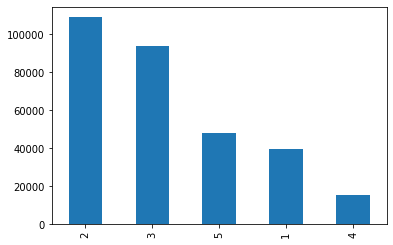

In [ ]:
print(pd.value_counts(Result_RF['Class']))
pd.value_counts(Result_RF['Class']).plot.bar()

In [ ]:
Result_RF.to_excel("Result_RF_Whole.xlsx")

SVM

In [ ]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing



# Learn to predict each class against the other   OneVsRestClassifier(classifier)
classifier_SVM = SVC(kernel = 'rbf',gamma=1,C=11,probability=True,random_state=RS )
classifier_SVM.fit(x_train, y_train)

SVC(C=11, gamma=1, probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_SVM, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 69.36 %
Standard Deviation: 7.51 %


In [ ]:
# Determine the value 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = {"kernel": ["rbf"], "gamma": [1e-3, 1e-4,1,3,5,7,9,11], "C": [1, 10,20,40,70, 100, 1000]}
scores = ["precision"]
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

ROC_Curve

In [ ]:
#Calculate the y_score
y_score = classifier_SVM.predict_proba(x_test)
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]
print('number of classes: ',n_classes)

fpr_SVM = dict()
tpr_SVM = dict()
roc_auc_SVM = dict()

for i in range(n_classes):
  fpr_SVM[i], tpr_SVM[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr_SVM[i], tpr_SVM[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr_SVM[i], tpr_SVM[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr_SVM["micro"], tpr_SVM["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_SVM["micro"] = auc(fpr_SVM["micro"], tpr_SVM["micro"])

csfont = {'fontname':'Times New Roman'}

plt.figure()
lw = 3.5
plt.plot(
    fpr_RF["micro"],
    tpr_RF["micro"],
    color="deeppink",
    lw=lw,
    label="SVM ROC curve (AUC = %0.3f)" % roc_auc_SVM["micro"],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel("False Positive Rate",**csfont,fontsize=14)
plt.ylabel("True Positive Rate",**csfont,fontsize=14)
plt.title("Receiver operating characteristics ",**csfont,fontsize=15)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.savefig("ROC_RF.jpg",bbox_inches='tight',dpi=600)
plt.show()

Accuracy_Kappa

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
y_pred = classifier_SVM.predict(x_test)
np.set_printoptions(precision=2)
print(y_pred.shape)


#Calculate accuracy 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test, y_pred)
print('kappa : %0.3f'%k)

(163,)
Confusion Matrix: 

[[15  6  3  2  0]
 [ 1 52  3  1  1]
 [ 1  4 30  0  3]
 [ 0  1  3 14  0]
 [ 0  0  3  5 15]]

overall Accuracy: 77.30 %
              precision    recall  f1-score   support

           1       0.88      0.58      0.70        26
           2       0.83      0.90      0.86        58
           3       0.71      0.79      0.75        38
           4       0.64      0.78      0.70        18
           5       0.79      0.65      0.71        23

    accuracy                           0.77       163
   macro avg       0.77      0.74      0.74       163
weighted avg       0.78      0.77      0.77       163

kappa : 0.699


Predict the whole data

In [ ]:
dataset1 = pd.read_csv('/content/20_Boreholes.txt',sep=";",decimal=",")
dataset1.info()
dataset1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         541 non-null    int64  
 1   OBJECTID    541 non-null    int64  
 2   Level_ST    541 non-null    float64
 3   GWL         541 non-null    float64
 4   Class       541 non-null    int64  
 5   NEAR_DIST   541 non-null    float64
 6   Rainfall_e  541 non-null    float64
 7   Landuse_ex  541 non-null    int64  
 8   lineament_  541 non-null    float64
 9   Geology_ex  541 non-null    int64  
 10  Drainage_E  541 non-null    float64
 11  slope_exte  541 non-null    float64
 12  DEM_EXT     541 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 55.1 KB


,FID,OBJECTID,Level_ST,GWL,Class,NEAR_DIST,Rainfall_e,Landuse_ex,lineament_,Geology_ex,Drainage_E,slope_exte,DEM_EXT
0,0,1,43.0,43.000000,5,0.0,415.355011,8,0.000000,3,0.187792,5.42764,476
1,1,2,102.1,102.099998,5,0.0,357.428009,1,0.556626,8,0.234448,8.58893,1198
2,2,3,17.9,34.310200,2,0.0,405.656006,8,0.000000,24,2.370210,17.49400,458
3,3,4,15.0,13.004200,2,0.0,404.942993,8,0.000000,24,1.043940,9.73678,384
4,4,5,35.0,34.999901,4,0.0,245.022995,7,0.000000,20,1.365040,3.76924,1033


In [ ]:
#Train the whole data 
x = dataset1.iloc[:, -7:].values  # [-2,-4]
y_class=dataset1.iloc[:, -9].values


sc_RF_All = StandardScaler()
x_train_All = sc_RF_All.fit_transform(x)


classifier_ALL = SVC(kernel = 'rbf',gamma=1,C=11,probability=True,random_state=RS)

classifier_ALL.fit(x_train_All, y_class)

SVC(C=11, gamma=1, probability=True, random_state=0)

In [ ]:
dataset2 = pd.read_csv('/content/drive/MyDrive/studyareapoints.txt',sep=";",decimal=",")
print(dataset2.shape)
dataset2.info()
dataset2.head()


(306620, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306620 entries, 0 to 306619
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FID         306620 non-null  int64  
 1   pointid     306620 non-null  int64  
 2   grid_code   306620 non-null  float64
 3   LAT         306620 non-null  float64
 4   LONG        306620 non-null  float64
 5   Rainfall_e  306620 non-null  float64
 6   Landuse_ex  306620 non-null  int64  
 7   lineament_  306620 non-null  float64
 8   Geology_ex  306620 non-null  int64  
 9   Drainage_E  306620 non-null  float64
 10  slope_exte  306620 non-null  float64
 11  DEM_EXT     306620 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 28.1 MB


,FID,pointid,grid_code,LAT,LONG,Rainfall_e,Landuse_ex,lineament_,Geology_ex,Drainage_E,slope_exte,DEM_EXT
0,0,464495,0.0,34.958714,-0.920515,454.028015,8,0.0,4,0.792559,4.76364,708
1,1,464496,0.0,34.958702,-0.919858,454.144989,8,0.0,4,0.767772,6.18293,709
2,2,464497,0.0,34.958691,-0.919202,454.260010,8,0.0,4,0.758741,6.25510,709
3,3,464498,0.0,34.958680,-0.918545,454.372986,8,0.0,4,0.792958,6.52699,708
4,4,464499,0.0,34.958669,-0.917888,454.484009,8,0.0,4,0.826668,4.58231,711


In [ ]:
XNL = dataset2.iloc[:, -7:].values  
Result_SVM = dataset2.iloc[:,[-9,-8]]
print(XNL)
print(XNL.shape)
Result_SVM.head()


[[4.54e+02 8.00e+00 0.00e+00 ... 7.93e-01 4.76e+00 7.08e+02]
 [4.54e+02 8.00e+00 0.00e+00 ... 7.68e-01 6.18e+00 7.09e+02]
 [4.54e+02 8.00e+00 0.00e+00 ... 7.59e-01 6.26e+00 7.09e+02]
 ...
 [4.09e+02 8.00e+00 0.00e+00 ... 4.46e-01 4.53e+00 6.71e+02]
 [4.09e+02 8.00e+00 0.00e+00 ... 4.30e-01 2.39e+00 6.73e+02]
 [4.09e+02 8.00e+00 0.00e+00 ... 4.13e-01 8.11e+00 6.71e+02]]
(306620, 7)


,LAT,LONG
0,34.958714,-0.920515
1,34.958702,-0.919858
2,34.958691,-0.919202
3,34.958680,-0.918545
4,34.958669,-0.917888


In [ ]:
XNL_T = sc_RF_All.transform(XNL) #feature scaling to unlabel data
label = classifier_ALL.predict(XNL_T) # pridiction
print(label[0])
print(label.shape)

1
(306620,)


In [ ]:
Result_SVM.insert(2, "Class", label, True)
Result_SVM.head()

,LAT,LONG,Class
0,34.958714,-0.920515,1
1,34.958702,-0.919858,2
2,34.958691,-0.919202,2
3,34.958680,-0.918545,2
4,34.958669,-0.917888,1


2    112651
3     86404
1     59630
5     24836
4     23099
Name: Class, dtype: int64


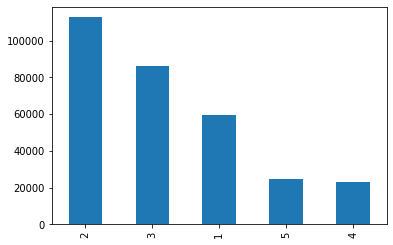

In [ ]:
print(pd.value_counts(Result_SVM['Class']))
pd.value_counts(Result_SVM['Class']).plot.bar()

In [ ]:
Result_SVM.to_excel("Result_SVM_Whole.xlsx")

NN

In [ ]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing


# Learn to predict each class against the other   OneVsRestClassifier(classifier)
classifier_NN = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(200,),  max_iter=1500)
classifier_NN.fit(x_train, y_train)





In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_NN, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

In [ ]:
# Determine the value 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = {"alpha": [0.1,0.01,0.001], "hidden_layer_sizes": [10,100,200], "max_iter": [500,1000,1500]}
scores = ["precision"]
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

ROC_curve

number of classes:  5
AUC for Class 1: 0.9138124649073553
AUC for Class 2: 0.8970443349753694
AUC for Class 3: 0.8974736842105263
AUC for Class 4: 0.9157088122605365
AUC for Class 5: 0.8515527950310559


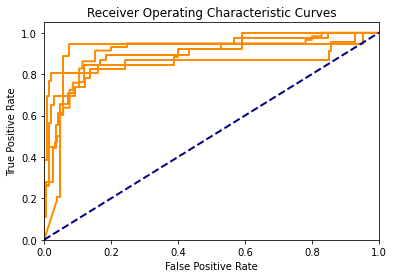

In [ ]:
#Calculate the y_score
y_score = classifier_NN.predict_proba(x_test)
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]
print('number of classes: ',n_classes)

fpr_NN = dict()
tpr_NN = dict()
roc_auc_NN = dict()

for i in range(n_classes):
  fpr_NN[i], tpr_NN[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr_NN[i], tpr_NN[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr_NN[i], tpr_NN[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

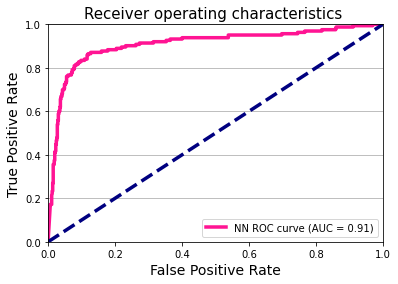

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr_NN["micro"], tpr_NN["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_NN["micro"] = auc(fpr_NN["micro"], tpr_NN["micro"])

csfont = {'fontname':'Times New Roman'}

plt.figure()
lw = 3.5
plt.plot(
    fpr_NN["micro"],
    tpr_NN["micro"],
    color="deeppink",
    lw=lw,
    label="NN ROC curve (AUC = %0.2f)" % roc_auc_NN["micro"],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel("False Positive Rate",**csfont,fontsize=14)
plt.ylabel("True Positive Rate",**csfont,fontsize=14)
plt.title("Receiver operating characteristics ",**csfont,fontsize=15)
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.savefig("ROC_NN.jpg",bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
y_pred = classifier_NN.predict(x_test)
np.set_printoptions(precision=2)
print(y_pred.shape)


#Calculate accuracy 
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test, y_pred)
print('kappa : %0.3f'%k)

(163,)
Confusion Matrix: 

[[20  2  2  1  1]
 [ 3 45  8  2  0]
 [ 1  5 25  2  5]
 [ 0  1  4 13  0]
 [ 2  1  2  5 13]]

overall Accuracy: 71.17 %
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        26
           2       0.83      0.78      0.80        58
           3       0.61      0.66      0.63        38
           4       0.57      0.72      0.63        18
           5       0.68      0.57      0.62        23

    accuracy                           0.71       163
   macro avg       0.69      0.70      0.69       163
weighted avg       0.72      0.71      0.71       163

kappa : 0.624


In [ ]:
importances = classifier_NN.feature_importances_
forest_importances = pd.Series(importances, index=["Rainfall","Landuse","Linemant","Geology","Drainage","Slope","DEM"])
csfont = {'fontname':'Times New Roman'}
print(importances)
std = np.std([tree.feature_importances_ for tree in classifier_RF.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ",**csfont,fontsize=15)
ax.set_ylabel("Importance value",**csfont,fontsize=15)
fig.tight_layout()
plt.grid()
plt.savefig("importance.jpg",bbox_inches='tight',dpi=600)

**Predict** **whole**

In [ ]:
dataset1 = pd.read_csv('/content/20_Boreholes.txt',sep=";",decimal=",")
dataset1.info()
dataset1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         541 non-null    int64  
 1   OBJECTID    541 non-null    int64  
 2   Level_ST    541 non-null    float64
 3   GWL         541 non-null    float64
 4   Class       541 non-null    int64  
 5   NEAR_DIST   541 non-null    float64
 6   Rainfall_e  541 non-null    float64
 7   Landuse_ex  541 non-null    int64  
 8   lineament_  541 non-null    float64
 9   Geology_ex  541 non-null    int64  
 10  Drainage_E  541 non-null    float64
 11  slope_exte  541 non-null    float64
 12  DEM_EXT     541 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 55.1 KB


,FID,OBJECTID,Level_ST,GWL,Class,NEAR_DIST,Rainfall_e,Landuse_ex,lineament_,Geology_ex,Drainage_E,slope_exte,DEM_EXT
0,0,1,43.0,43.000000,5,0.0,415.355011,8,0.000000,3,0.187792,5.42764,476
1,1,2,102.1,102.099998,5,0.0,357.428009,1,0.556626,8,0.234448,8.58893,1198
2,2,3,17.9,34.310200,2,0.0,405.656006,8,0.000000,24,2.370210,17.49400,458
3,3,4,15.0,13.004200,2,0.0,404.942993,8,0.000000,24,1.043940,9.73678,384
4,4,5,35.0,34.999901,4,0.0,245.022995,7,0.000000,20,1.365040,3.76924,1033


In [ ]:
#Train the whole data 
x = dataset1.iloc[:, -7:].values  # [-2,-4]
y_class=dataset1.iloc[:, -9].values


sc_RF_All = StandardScaler()
x_train_All = sc_RF_All.fit_transform(x)


classifier_ALL = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(200,),  max_iter=1500)

classifier_ALL.fit(x_train_All, y_class)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(200,), max_iter=1500,
              solver='lbfgs')

In [ ]:
dataset2 = pd.read_csv('/content/drive/MyDrive/studyareapoints.txt',sep=";",decimal=",")
print(dataset2.shape)
dataset2.info()
dataset2.head()


(306620, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306620 entries, 0 to 306619
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FID         306620 non-null  int64  
 1   pointid     306620 non-null  int64  
 2   grid_code   306620 non-null  float64
 3   LAT         306620 non-null  float64
 4   LONG        306620 non-null  float64
 5   Rainfall_e  306620 non-null  float64
 6   Landuse_ex  306620 non-null  int64  
 7   lineament_  306620 non-null  float64
 8   Geology_ex  306620 non-null  int64  
 9   Drainage_E  306620 non-null  float64
 10  slope_exte  306620 non-null  float64
 11  DEM_EXT     306620 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 28.1 MB


,FID,pointid,grid_code,LAT,LONG,Rainfall_e,Landuse_ex,lineament_,Geology_ex,Drainage_E,slope_exte,DEM_EXT
0,0,464495,0.0,34.958714,-0.920515,454.028015,8,0.0,4,0.792559,4.76364,708
1,1,464496,0.0,34.958702,-0.919858,454.144989,8,0.0,4,0.767772,6.18293,709
2,2,464497,0.0,34.958691,-0.919202,454.260010,8,0.0,4,0.758741,6.25510,709
3,3,464498,0.0,34.958680,-0.918545,454.372986,8,0.0,4,0.792958,6.52699,708
4,4,464499,0.0,34.958669,-0.917888,454.484009,8,0.0,4,0.826668,4.58231,711


In [ ]:
XNL = dataset2.iloc[:, -7:].values  
Result_NN = dataset2.iloc[:,[-9,-8]]
print(XNL)
print(XNL.shape)
Result_NN.head()


[[4.54e+02 8.00e+00 0.00e+00 ... 7.93e-01 4.76e+00 7.08e+02]
 [4.54e+02 8.00e+00 0.00e+00 ... 7.68e-01 6.18e+00 7.09e+02]
 [4.54e+02 8.00e+00 0.00e+00 ... 7.59e-01 6.26e+00 7.09e+02]
 ...
 [4.09e+02 8.00e+00 0.00e+00 ... 4.46e-01 4.53e+00 6.71e+02]
 [4.09e+02 8.00e+00 0.00e+00 ... 4.30e-01 2.39e+00 6.73e+02]
 [4.09e+02 8.00e+00 0.00e+00 ... 4.13e-01 8.11e+00 6.71e+02]]
(306620, 7)


,LAT,LONG
0,34.958714,-0.920515
1,34.958702,-0.919858
2,34.958691,-0.919202
3,34.958680,-0.918545
4,34.958669,-0.917888


In [ ]:
XNL_T = sc_RF_All.transform(XNL) #feature scaling to unlabel data
label = classifier_ALL.predict(XNL_T) # pridiction
print(label[0])
print(label.shape)

1
(306620,)


In [ ]:
Result_NN.insert(2, "Class", label, True)
Result_NN.head()

,LAT,LONG,Class
0,34.958714,-0.920515,1
1,34.958702,-0.919858,1
2,34.958691,-0.919202,1
3,34.958680,-0.918545,1
4,34.958669,-0.917888,1


3    78789
1    78511
2    77172
5    59990
4    12158
Name: Class, dtype: int64


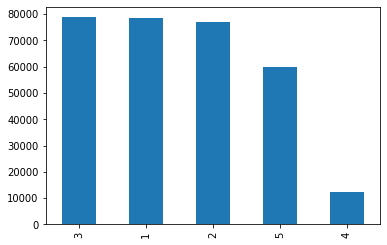

In [ ]:
print(pd.value_counts(Result_NN['Class']))
pd.value_counts(Result_NN['Class']).plot.bar()

In [ ]:
Result_NN.to_excel("Result_NN_Whole.xlsx")

Pie Plot

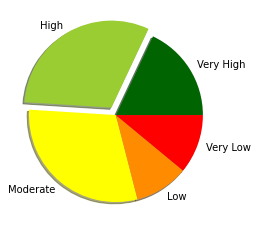

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([18,31, 30, 10, 11])
mylabels = ["Very High", "High", "Moderate", "Low","Very Low"]
myexplode = [0, 0.1, 0, 0,0]
mycolors = ["DarkGreen", "YellowGreen", "Yellow", "DarkOrange","Red"]


plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,colors = mycolors)
plt.savefig("Pie_NN.jpg",dpi=200)
plt.show() 




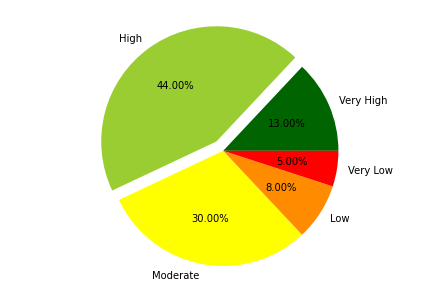

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

#y = np.array([18,31, 30, 10, 11])  #NN

#y = np.array([7,41, 32, 8, 12])  #RF

y = np.array([13,44, 30,8 ,5 ])  #SVM

students = [23,17,35,29,12]
mylabels = ["Very High", "High", "Moderate", "Low","Very Low"]
myexplode = [0, 0.1, 0, 0,0]
mycolors = ["DarkGreen", "YellowGreen", "Yellow", "DarkOrange","Red"]
ax.pie(y, labels = mylabels,autopct='%1.2f%%',explode = myexplode,colors = mycolors)
plt.savefig("Pie_SVM.jpg",bbox_inches='tight',dpi=600)
plt.show()